LINEAR REGRESSION

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/pharmacy (1).csv')

In [3]:

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Cholesterol', 'Sex', 'Drug', 'BP']

In [6]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns

['Age', 'Na_to_K']

Text(0.5, 1.0, 'Age vs Drug')

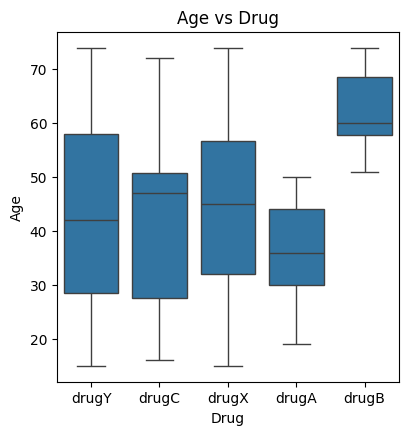

In [20]:

plt.figure(figsize=(15, 10))

# Boxplot for Age vs Drug
plt.subplot(2, 3, 1)
sns.boxplot(x='Drug', y='Age', data=data)
plt.title('Age vs Drug')


Text(0.5, 1.0, 'Na_to_K vs Drug')

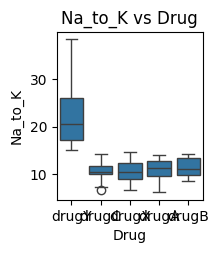

In [21]:
# Boxplot for Na_to_K vs Drug
plt.subplot(2, 3, 2)
sns.boxplot(x='Drug', y='Na_to_K', data=data)
plt.title('Na_to_K vs Drug')


Text(0.5, 1.0, 'Sex vs Drug')

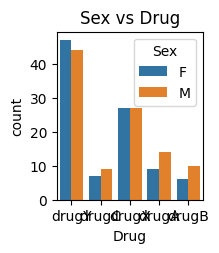

In [22]:
# Countplot for Sex vs Drug
plt.subplot(2, 3, 3)
sns.countplot(x='Drug', hue='Sex', data=data)
plt.title('Sex vs Drug')

Text(0.5, 1.0, 'BP vs Drug')

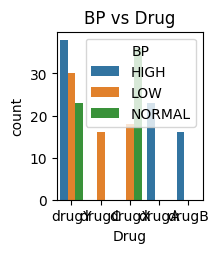

In [23]:
# Countplot for BP vs Drug
plt.subplot(2, 3, 4)
sns.countplot(x='Drug', hue='BP', data=data)
plt.title('BP vs Drug')

Text(0.5, 1.0, 'Cholesterol vs Drug')

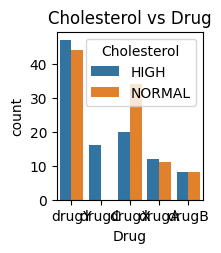

In [24]:

# Countplot for Cholesterol vs Drug
plt.subplot(2, 3, 5)
sns.countplot(x='Drug', hue='Cholesterol', data=data)
plt.title('Cholesterol vs Drug')


In [7]:
# Converting categorical variables to dummy variables
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)



In [8]:

# Spliting the data into features and target variable
X = data_encoded.drop('Drug', axis=1)
y = data_encoded['Drug']


In [11]:
# Spliting  the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
#  the first few rows of the encoded dataset
print(data_encoded.head())

   Age  Na_to_K   Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   23   25.355  drugY  False   False      False               False
1   47   13.093  drugC   True    True      False               False
2   47   10.114  drugC   True    True      False               False
3   28    7.798  drugX  False   False       True               False
4   61   18.043  drugY  False    True      False               False


In [12]:
# the shapes of the train/test splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 6) (60, 6) (140,) (60,)


In [13]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

#  predictions
y_pred = model.predict(X_test_scaled)

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  1  0  0 25]]
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

